# Random Walks and Monte Carlo

In [77]:
import pandas as pd
import numpy as np
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Random Walk Generation

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$
- $\mu$ stands for mu   
- $\xi_t$ stands for xi

In [78]:
def gbm(n_years= 10, n_scenarios= 1000, mu= 0.07, sigma= 0.15, steps_per_year=12, s_0= 100): 
    """
    Evolution of the Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year) #Make sure this should be a integer
    xi = np.random.normal(size=(n_steps, n_scenarios)) #xi is a Random Browninan Motion, it's a random normal number
    rets= mu*dt + sigma* np.sqrt(dt)*xi
    rets= pd.DataFrame(rets)
    #Conver retrun into price
    prices= s_0*(1+rets).cumprod() #Cumprod of inital Stock price
    return prices

In [79]:
p =gbm(10, n_scenarios=3)
p.head()

,0,1,2
0,97.600334,96.837844,102.831995
1,99.154956,94.895857,108.073468
2,99.829255,99.560810,99.680152
3,102.593215,98.186595,99.310809
4,109.729609,105.478199,100.284931


<AxesSubplot:>

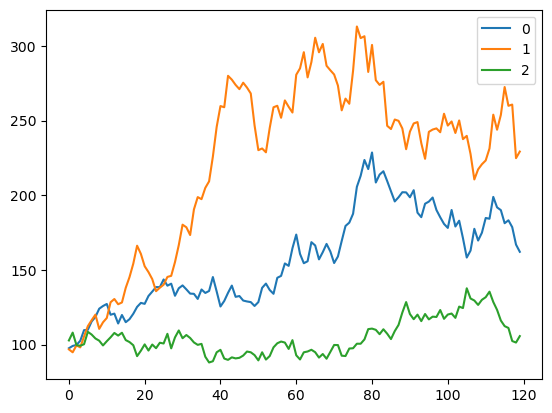

In [80]:
p.plot()

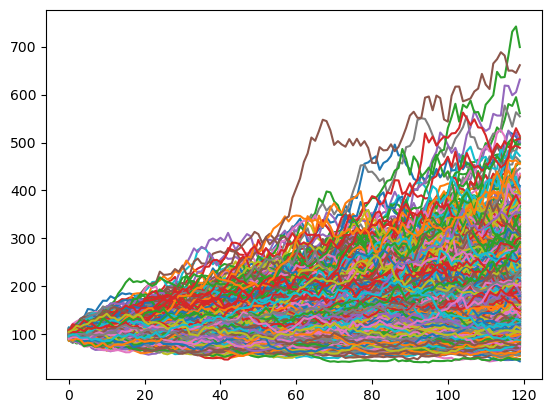

In [81]:
p= gbm(n_years=10, n_scenarios= 1000).plot(legend=False)

In [82]:
%timeit gbm(n_years=5, n_scenarios= 1000)

2.62 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
#Modify our code to make it running more efficient
def gbm(n_years= 10, n_scenarios= 1000, mu= 0.07, sigma= 0.15, steps_per_year=12, s_0= 100): 
    """
    Evolution of the Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year) #Make sure this should be a integer
    rets_plus_1 = np.random.normal(loc=1+mu*dt, scale=(sigma*np.sqrt(dt)) , size=(n_steps, n_scenarios)) #Generate Random Number that follow our formula
    #Conver retrun into price
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod() #Cumprod of inital Stock price
    return prices

In [84]:
%timeit gbm(n_years=5, n_scenarios= 1000)

2.43 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

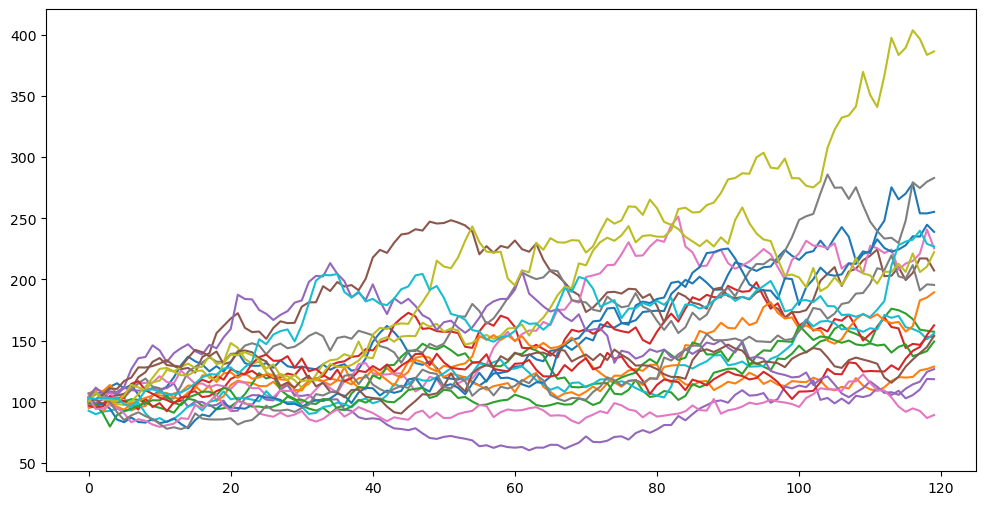

In [85]:
gbm(n_years= 10, n_scenarios= 20).plot(figsize=(12,6), legend=False)

In [86]:
# Update some details to make sure we start at the s_0
def gbm(n_years= 10, n_scenarios= 1000, mu= 0.07, sigma= 0.15, steps_per_year=12, s_0= 100): 
    """
    Evolution of the Stock Price using a Geometric Brownian Motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year) #Make sure this should be a integer
    rets_plus_1 = np.random.normal(loc=1+mu*dt, scale=(sigma*np.sqrt(dt)) , size=(n_steps, n_scenarios)) #Generate Random Number that follow our formula
    rets_plus_1[0]= 1
    #Conver retrun into price
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod() #Cumprod of inital Stock price
    return prices

<AxesSubplot:>

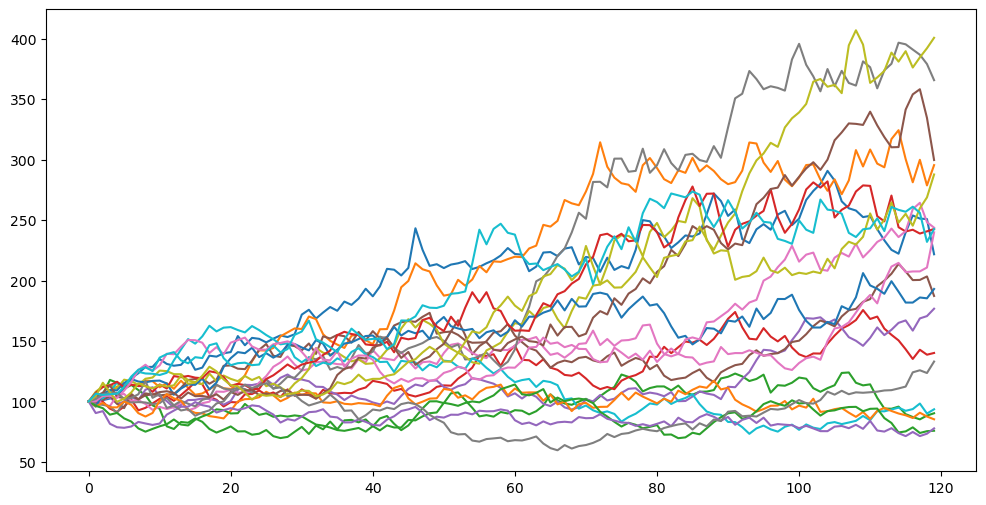

In [87]:
gbm(n_years= 10, n_scenarios= 20).plot(figsize=(12,6), legend=False)